In [45]:
# === 1. Importar librerías ===
from drawdata import ScatterWidget
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

import ipywidgets as widgets
widgets.Button(description="PROBAR")


Button(description='PROBAR', style=ButtonStyle())

In [46]:
import ipywidgets
ipywidgets.__version__


'8.1.8'

In [47]:
from IPython.display import display
display(widget)



In [55]:
# Obtener datos del widget
X, y = widget.data_as_X_y


In [56]:
widget.data_as_X_y

(array([[270.26874837, 444.92943042],
        [489.5256008 , 433.26648089],
        [485.23651157, 431.75710467],
        [140.33841653, 404.64368789],
        [138.45408016, 398.0352869 ],
        [169.58688771, 408.06891028],
        [149.15827038, 401.40732447],
        [167.26416092, 423.0383321 ],
        [180.84395891, 415.89227121],
        [215.82847134, 417.99676412],
        [230.32938947, 414.43738583],
        [215.75954108, 445.52952253],
        [210.70673028, 419.90720803],
        [226.49236315, 428.84386743],
        [215.03188889, 447.63358827],
        [209.28407745, 425.12592511],
        [220.85849166, 408.11734603],
        [223.87386681, 412.82885118],
        [245.44227748, 406.73224546],
        [246.27411314, 413.81680621],
        [237.46138846, 413.79780104],
        [236.66603525, 414.2455284 ],
        [227.28135111, 423.45125744],
        [204.1656272 , 377.83459901],
        [214.52036324, 391.16409307],
        [223.38332538, 410.81641848],
        [215

In [57]:
# Convertir etiquetas de color a números
le = LabelEncoder()
y = le.fit_transform(y)

print("Clases originales:", le.classes_)
print("y numérico:", y)

Clases originales: ['#1f77b4' '#d62728' '#ff7f0e']
y numérico: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


In [58]:
print(type(widget.data_as_X_y))

<class 'tuple'>


In [59]:
print(f"Datos cargados: {X.shape[0]} puntos, {len(np.unique(y))} clases detectadas")

Datos cargados: 267 puntos, 3 clases detectadas


In [60]:
from sklearn.decomposition import PCA

if X.shape[1] > 2:
    pca = PCA(n_components=2)
    X = pca.fit_transform(X)


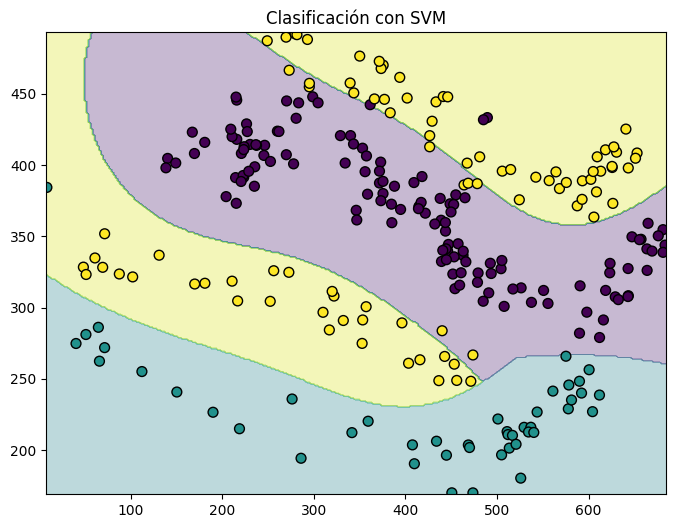

In [61]:
# === 5. Elegir el modelo === 
model_name = "svm"

models = {
    "svm": SVC(kernel='rbf', probability=True),
    "knn": KNeighborsClassifier(n_neighbors=5),
    "logreg": LogisticRegression(max_iter=200),
    "tree": DecisionTreeClassifier()
}

model = models[model_name]

# === 6. Entrenar ===
model.fit(X, y)

# === 7. Graficar frontera ===
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, s=50, edgecolors='black')
plt.title(f"Clasificación con {model_name.upper()}")
plt.show()